# Project 3: Differentiation/Integration and Filtering with Op Amps


This weeks project comes in 2 parts: **Part A** is to build a circuit that produces an output voltage waveform that is proportional to the time derivative of the input waveform. **Part B** is to build a circuit that filters out frequencies above a certain *cutoff* frequency, but leaves lower frequencies unaffected.

Let's start with the differentiator. The name "operational amplifier" comes from the historical use of amplifiers as elements of analog computers in which they played the role of mathematical operators. Last week we learning how to multiply a voltage by a constant (called the "gain"). It turns out that other operations are also possible. For example as shown in Figure 1 you can add multiple voltages using a "summing amplifier":

|Figure 1|
|:-|
|![A summing Amplifier](./sum.png)|
|A summing Amplifier |

Let's analyze the output of this amplifier by applying the "rules" from last time. 

1. No current enters or leaves the inputs. 
2. The output voltage adjusts to make $V_+$ and $V_-$ equal.

You should convince yourself that in order to satisfy (1) for the $V_+$ input we need:

$$V_+ = \frac{V_1 + V_2 + V_3}{3}$$

**Question 1**: If $R_2$ is $1\,{\rm k\Omega}$ what value must $R_1$ have to make the output $V_{\rm out} = V_1+V_2+V_3$? 

What about calculus? Sure! We can take derivatives and also integrate voltages. This week's project is to take the derivative of a "triangle" wave (similar to the PWM output from the Arduino from last time). Consider the circuit shown in Figure 2:

|Figure 2|
|-|
|![A differenciating Amplifier](./diff.png)|
|A differentiating Amplifier |

**Question 2**: Use rule number 1 above to deduce the voltage at the `+` input of the LM324 that we'll call $V_+$ (Ask if you're not sure how to get this!). Now, $V_{\rm in}$ comes from the PWM output of the Arduino. The current flowing into and out of the capacitor is equal to:

$$ I = C_{\rm in}\frac{dV_{\rm in}}{dt}$$

Why? Ask if you don't remember this from PHYS 163. 

Given this you should be able to deduce that the output voltage will be:

$$ V_{\rm out} = V_+ - R_F C_{\rm in} \frac{dV_{\rm in}}{dt}$$

Note that this is proportional to the derivative of the input voltage plus an offset. So we're using electronics to *compute* the derivative of a function (signal)!

## Part A

Deliverables:

Construct the circuit from Figure 2 and check:

1. Does $V_+$ have the voltage you expect? Explain.

2. Is the output what you expect? Explain. Be sure to use the measured slope of $\frac{dV_{\rm in}}{dt}$ and the nominal values you use of $R$ and $C$ to check the behavior of your circuit.

In the cell below you can see an example of what the output of your circuit should look like when you're finished.



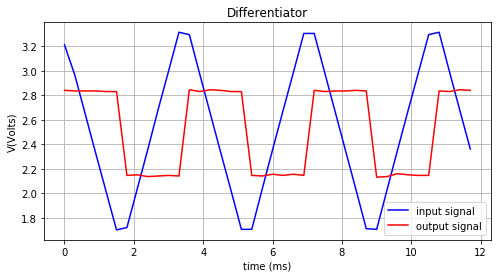

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as pl

data = pd.read_csv('data.csv')

pl.figure(figsize=(8,4))
pl.plot(data.time, data.voltageSrc, 'b-', label="input signal")
pl.plot(data.time, data.voltageAmp, 'r-', label="output signal")

pl.title("Differentiator")
pl.ylabel("V(Volts)")
pl.xlabel("time (ms)")
pl.legend(loc=4)
pl.grid()



## Filters

You've actually already see a *filter* in this course. The RC circuits we've been using to shape the output of the PWM signals from the Arduino are examples of simple passive filters. A filter is just a network of electrical components that affects different frequency components of an electrical signal differently (e.g., with a different amount of *gain*). For example if you consider a simple RC ciruit like this one:

![RC Circuit](./RC.png)

What kind of output do you expect if you apply a sinusoidal input to this circuit?

Well, we can use Ohm's Law for the resistor:

$$V_R = I R$$

and we can use the fact that $Q=CV_C$ for the capacitor or:

$$I = C \frac{dV_C}{dt}.$$

Kirchoff's Voltage Law demands that:

$$V_{\rm in} = V_R + V_C$$

taking the time derivative we get:

$$\frac{dV_{\rm in}}{dt} = R \frac{dI}{dt} + \frac{I}{C}\ \ \ ({\rm Eq.} 1)$$

Now, suppose $V_{\rm in} = V_{0} \sin(\omega t)$, then we get:

$$ \omega V_{0} \cos (\omega t) =  R \frac{dI}{dt} + \frac{I}{C}$$

Now, if you actually do the experiment, and wait around a while after you start the input you'll see something like this:

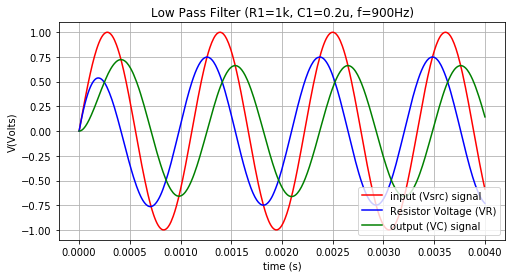

In [23]:
data = pd.read_csv('data2.csv', delimiter='\t')

pl.figure(figsize=(8,4))
pl.plot(data.time, data.Vin, 'r-', label="input (Vsrc) signal")
pl.plot(data.time, data.VR, 'b-', label="Resistor Voltage (VR)")
pl.plot(data.time, data.Vout, 'g-', label="output (VC) signal")

pl.title("Low Pass Filter (R1=1k, C1=0.2u, f=900Hz)")
pl.ylabel("V(Volts)")
pl.xlabel("time (s)")
pl.grid()
pl.legend(loc=4)

If you contemplate this result for a bit you'll notice a few things.

   1. After a few cycles all the signals appear to be sinusoidal with different phases.
    
   2. At first $V_R$ appars to be proportional to $V_{\rm in}$, at least until the capacitor starts to charge. However after a short while this is no longer true and there is a definite phase relationship between $V_R$, $V_C$ and $V_{\rm in}$ as fixed amplitude sinusoidal waveforms.
   
The following section works out the details of the analytical solution to Eq. 1. These are also described in your PHYS 163 textbook, [1].
   
# Analytical Solution using Plain Old Calculus

With this bit of experimental sleuthing, let's take this as inspiration to make a guess at a solution. Suppose $I$ is a sinusoidal current that has a different phase from the input voltage.

$$ I(t) = I_0 \sin(\omega t + \phi) $$

If we plug this "guess" back into the relationship:

$$ \omega V_{0} \cos (\omega t) =  R \frac{dI}{dt} + \frac{I}{C}$$

We get:

$$ \omega V_{0} \cos (\omega t) =  \omega R I_0 \cos(\omega t + \phi) + \frac{I_0 \sin(\omega t + \phi)}{C}$$

expanding the $\cos$ and the $\sin$ functions gives:

$$ \omega V_{0} \cos (\omega t) =  \omega R I_0 \left( \cos(\omega t)\cos(\phi) - \sin(\omega t)\sin(\phi) \right) + \frac{I_0 \left(\sin(\omega t)\cos(\phi)) + \cos(\omega t)\sin(\phi)\right )}{C}$$

The only way this can work is if the $\cos$ parts and the $\sin$ parts agree, so:

$$ \omega V_{0} = \omega R I_0 \cos(\phi) + \frac{I_0 \sin(\phi)}{C}$$

and

$$ \omega R I_0 \sin(\phi) = \frac{I_0 \cos(\phi)}{C} $$

The value of $I_0$ cancels in the second equation giving us:

$$ \tan(\phi) = \frac{1}{\omega R C} $$

which immediately gives us:

$$ \sin(\phi) = \frac{1}{\sqrt{1+(\omega R C)^2}}, \cos(\phi) = \frac{\omega R C}{\sqrt{1+(\omega R C)^2}} $$

solving for the current in the top equation we get:

$$ I_0 = \frac{V_0 \omega C}{\sqrt{1+(\omega R C)^2}} $$

This gives us a resistor voltage $V_R$ of:

$$V_R(t) = I(t)R = I_0 R \sin(\omega t + \phi) = \frac{V_0 R \omega C}{\sqrt{1+(\omega R C)^2}} \sin(\omega t + \phi) $$

to get the output voltage, we can subtract $V_R$ from the input voltage:

$$ V_C(t) = V_0 \sin(\omega t) - I_0 R \sin(\omega t + \phi) $$

rearranging we get:

$$ V_C(t) = \frac{I_0}{\omega C} \sin(\omega t - \frac{\pi}{2} + \phi) = \frac{V_0}{\sqrt{1+(\omega R C)^2}} \sin(\omega t - \frac{\pi}{2} + \phi) $$

So we get the final results:

$$ V_{\rm in} = V_0 \sin(\omega t) $$

$$ V_{\rm out} = \frac{V_0}{\sqrt{1+(\omega R C)^2}} \sin(\omega t - \frac{\pi}{2} + \phi) $$

where

$$\phi=\tan^{-1}\left(\frac{1}{\omega R C}\right) $$

# Analytical Solution Using Complex Impedence

Whew! That was a fair amount of math. But it didn't require any *new* math beyond Calc I. I want to introduce a variation on this that uses the Euler relationship:

$$e^{i \theta} = \cos(\theta) + i \sin(\theta) $$

This is a truly beautiful thing that turns derivatives into multiplication! Why? How? Simple. Suppose we decide to represent the current in our system as the real part of a complex number, like so:

$$ I(t) = \Re(I_0 e^{i \omega t}) = I_0 \cos(\omega t) $$

Then:

$$ \frac{dI(t)}{dt} = \Re(I_0 i \omega e^{i \omega t}) = - I_0 \sin(\omega t) $$

Notice that taking the real part get's us back to the "regular" result, but until we take the real part taking the derivative is the same as *multiplying* by $i\omega$. 

So here are the rules:

* Don't worry about the complex numbers, just use them as if they were "regular" numbers, but at the *end* of the calculation, take the real part of the result to sort out what you'd actually measure in the laboartory.

* Invent a few new AC terms: reactance and impedence to replace DC component values. These behave like resistance mathematically except that they have complex values.

* Reactiance is sort of like the effective AC, 90 degree out of phase "resistance" of a capacitor (or inductors) in a mathematical sense. 

* Impedence is sort of like the effective AC, off phase "resistance" of a complex circuit consisting of resitances and reactances in some combination.

It helps to visualize these voltages and currents as *phasors*. A phasor is an arrow in the complex plane like so:

![Phasor](./PhasorEuler.png)

You can see that the real part, the projection onto the real axis, is $\cos(\omega t)$ and the imaginary part, the projection onto the imaginary axis, is $\sin(\omega t)$. OK, that's enough of that for now, let's see how it works.

Let's start with the relationship between current and voltage on a capacitor:

$$ I(t) = C \frac{dV_C(t)}{dt} $$

Now suppose:

$$ V_C(t) = V_0 e^{i \omega t} $$

Then:

$$ I(t) = C \frac{dV_C(t)}{dt} = C i \omega V_C(t) $$

So: 

$$ V_C(t) = \frac{-i}{\omega C} I(t) $$

Note the simlarity with the voltage on a resistor given by Ohm's Law:

$$ V_R(t) = R I(t)$$

We *define* reactance $X_C$ so that it plays the same role for a capactor as R plays for a resistor:

$$ V_C(t) = X_C I(t) = \left( \frac{-i}{\omega C} \right) I(t) $$

So: 

$$X_C = \frac{-i}{\omega C}$$




1. Chabay and Sherwood, Matter and Interactions, ch 19, section 9, 4th ed, Wiley, 2015